<a href="https://colab.research.google.com/github/sruthiravindra/DataScience/blob/master/DataMining_Telco_Customer_Churn_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Question 1: DataType, DistinctValues and Range of attributes

In [ ]:
df = pd.read_csv("sample_data/Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Inference:

1. The data set contains 7043 records in total with 21 columns.
2. Churn is the target variable.
3. Following are the attributes of the dataset

***list all attributes and its datatypes***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***Convert TotalCharges from object datatype to numeric as its a float datatype***

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

***DataType, DistinctValues and Range of attributes***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
  categorical_cols = df.select_dtypes(include=['object']).columns
  distinct_vals = {cols: df[cols].unique() for cols in categorical_cols}

  for col, values in distinct_vals.items():
    print(f"{col}:{values}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

col_range = {col: (df[col].min(), df[col].max()) for col in numeric_cols}

for col, range in col_range.items():
  print(f"{col}: {range}")


SeniorCitizen: (0, 1)
tenure: (0, 72)
MonthlyCharges: (18.25, 118.75)
TotalCharges: (18.8, 8684.8)


***check for null values***

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

***we see that after converting the column contains 11 null values. Let us insert 0 for these null values***

In [ ]:
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'].isna().sum()

0

***Which checking the range valules above we can see that customerID is like a unique value in the dataset and would have a 1:1 relationship with all other attributes. Hence let us drop the customerID column too as it is an irrelevant column for this analysis.***

In [ ]:
# Drop column in place
df = df.drop(['customerID'], axis=1)

***we can use describe to find the mean, standard deviation and other statistical informations about all numeric columns in our dataset***

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


From above output lets consider our observation of the numeric columns alone :

1. Around 75% of customers have stayed for 55 months and were charged at 89.85.
2. From the values of standard deviation and mean we can notice that the data is not symmetrically distributed.
3. Mean Monthly charges is about 64.76 units and 75% of observations are monthly charged around 89.85

Let us plot some plots to gather further insights into this

# Question 2: Create the plots and charts discussed

In [ ]:
df1 = df.copy()

# PieChart

In [ ]:
import plotly.express as px

# Count the occurrences of each churn type
churn_counts = df['Churn'].value_counts()

# Create a Pie chart with Plotly Express
fig = px.pie(churn_counts, names=churn_counts.index, values=churn_counts.values,
             color=churn_counts.index,  # Use colors based on the Churn types
             color_discrete_map={'Yes': 'red', 'No': 'green'},  # Custom color mapping
             labels={'labels': 'Churn Type', 'values': 'Count'},
             title='Churn Rate Pie Chart')

# Show the plot
fig.show()


From the pie chart we can see that around 26.5% customers have churned.

Majority (73.5%) seem to be satisfied and retained.

# Box Plot

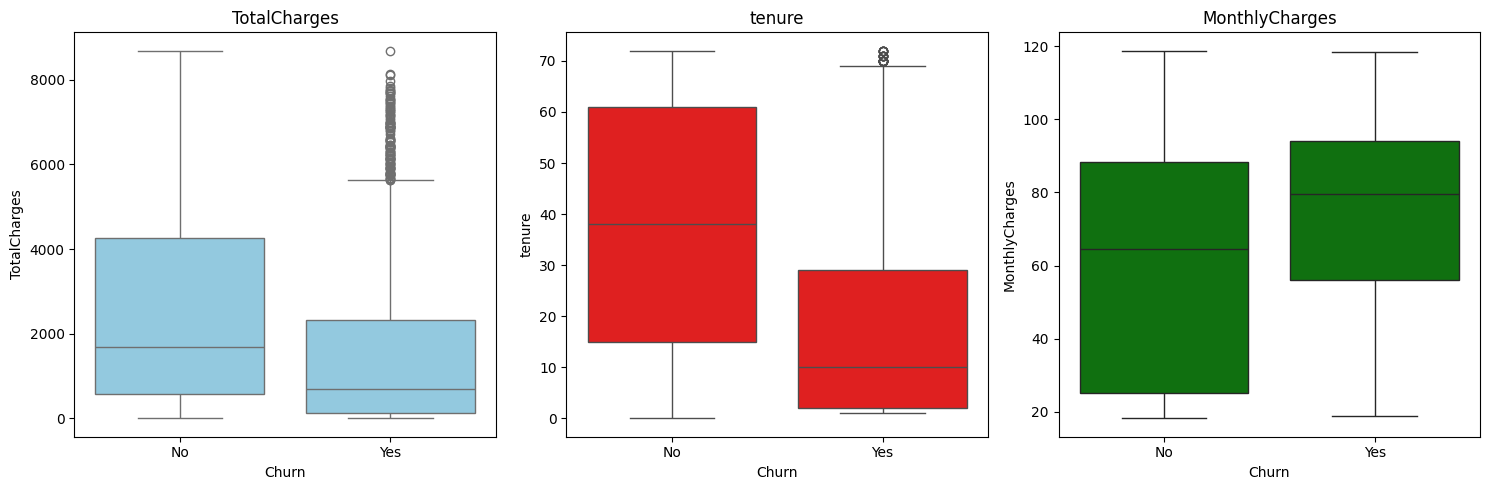

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Set the color you want for the box plots
boxplot_colors = ['skyblue', 'red', 'green']  # You can customize the colors as needed

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create box plots for each variable
for i, col in enumerate(['TotalCharges', 'tenure', 'MonthlyCharges']):
    sns.boxplot(x=df['Churn'], y=df[col], color=boxplot_colors[i], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The “TotalCharges” plot (blue) ranges from 0 to 8000, with the interquartile range (IQR) between approximately 100 and 4000. The totalcharges is positively skewed.

The “tenure” plot (red) ranges from 0 to about 70, with the IQR between roughly 10 and 60. The tenure is almost symmetric, equally distributed.

The “MonthlyCharges” plot (green) ranges from around 20 to over 100, with the IQR between approximately 40 and 90. The MonthlyCharges is negatively skewed.

All three plots have median lines within their respective IQR boxes.

There are no outliers

# Histogram

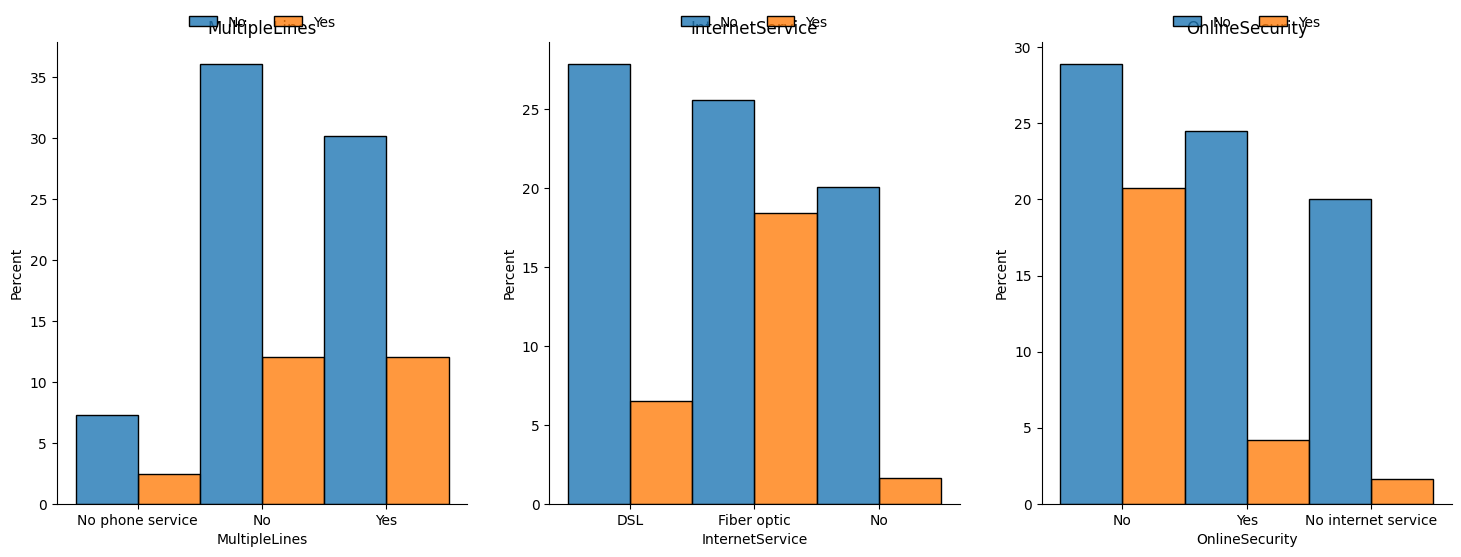

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Create subplots for each column

# Plot for 'MultipleLines'
sns.histplot(data=df, x='MultipleLines', hue='Churn', stat='percent', multiple='dodge', ax=axes[0], binwidth=5, alpha=0.8)
axes[0].set_title('MultipleLines')

# Plot for 'InternetService'
sns.histplot(data=df, x='InternetService', hue='Churn', stat='percent', multiple='dodge', ax=axes[1], binwidth=5, alpha=0.8)
axes[1].set_title('InternetService')

# Plot for 'OnlineSecurity'
sns.histplot(data=df, x='OnlineSecurity', hue='Churn', stat='percent', multiple='dodge', ax=axes[2], binwidth=5, alpha=0.8)
axes[2].set_title('OnlineSecurity')

# Move legend to the lower center for all subplots
for ax in axes:
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()
plt.show()


By Comparing the histrograms for MultipleLines, InternetServices and OnlineSecurity we can see that around 20% of customers who were offered  FibreOpticInterServices have churned the most.

Also 20% of customers who were not offered OnlineSecurity have also churned.

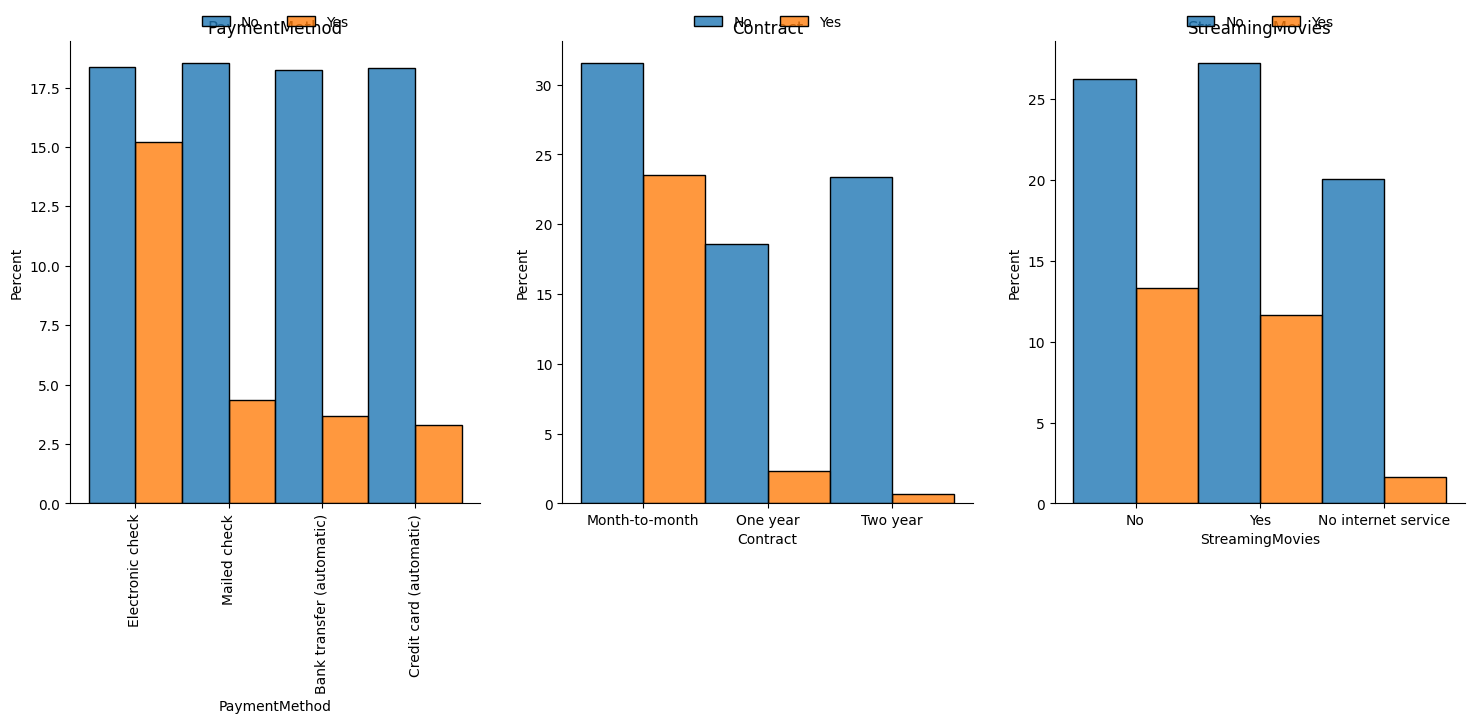

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Create subplots for each column

# Plot for 'MultipleLines'
sns.histplot(data=df, x='PaymentMethod', hue='Churn', stat='percent', multiple='dodge', ax=axes[0], binwidth=5, alpha=0.8)
axes[0].set_title('PaymentMethod')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot for 'InternetService'
sns.histplot(data=df, x='Contract', hue='Churn', stat='percent', multiple='dodge', ax=axes[1], binwidth=5, alpha=0.8)
axes[1].set_title('Contract')

# Plot for 'OnlineSecurity'
sns.histplot(data=df, x='StreamingMovies', hue='Churn', stat='percent', multiple='dodge', ax=axes[2], binwidth=5, alpha=0.8)
axes[2].set_title('StreamingMovies')

# Move legend to the lower center for all subplots
for ax in axes:
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()
plt.show()


By comparing the histograms we can see that constract of type month-to-month is more volatile with more than 25% customers churning. Two year contract seem to be more reliable.

Streaming services seem to have less influence of churn decision.

Electronic payment method have most number of customer churn.





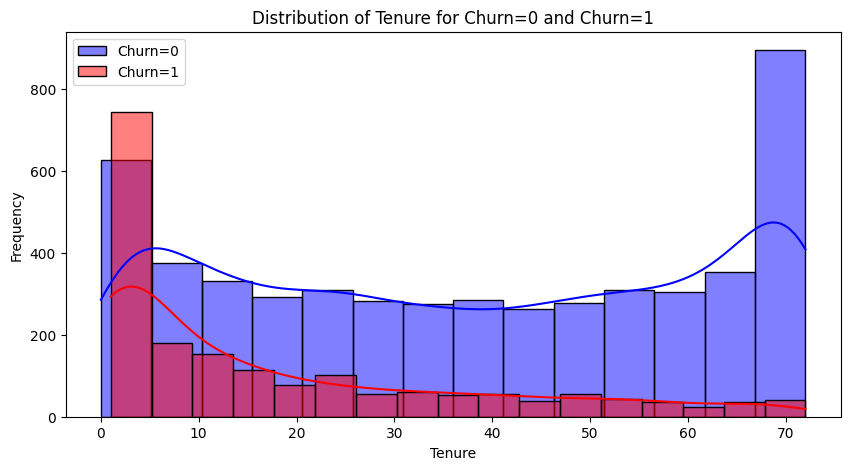

In [ ]:

# Plot distribution of MonthlyCharges for Churn=0
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Churn'] == 'No']['tenure'], kde=True, color='blue', label='Churn=0')

# Plot distribution of MonthlyCharges for Churn=1
sns.histplot(df[df['Churn'] == 'Yes']['tenure'], kde=True, color='red', label='Churn=1')

# Set plot labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure for Churn=0 and Churn=1')

# Show legend
plt.legend()

From the tenure histogram we can conclude that the maximum tenure is around 70.

Most of the customers churn before completing a tenure of 5 months.

We can also observe that tenure and churn are inversely propotional

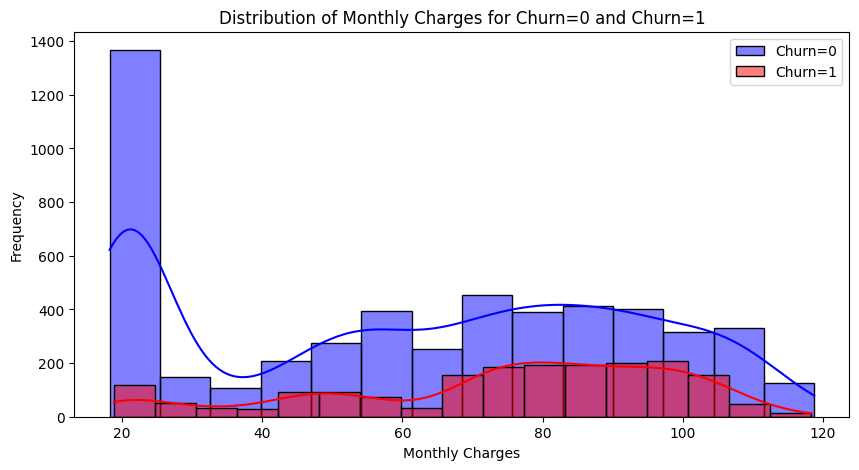

In [ ]:

# Plot distribution of MonthlyCharges for Churn=0
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Churn'] == 'No']['MonthlyCharges'], kde=True, color='blue', label='Churn=0')

# Plot distribution of MonthlyCharges for Churn=1
sns.histplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], kde=True, color='red', label='Churn=1')

# Set plot labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges for Churn=0 and Churn=1')

# Show legend
plt.legend()

Observation:
1. We can observe that when as MonthlyCharges increase the ratio of churners also increases.
2. Also, we can assume that MonthlyCharge=20 has more customer retension capacity that a MonthlyCharge=120

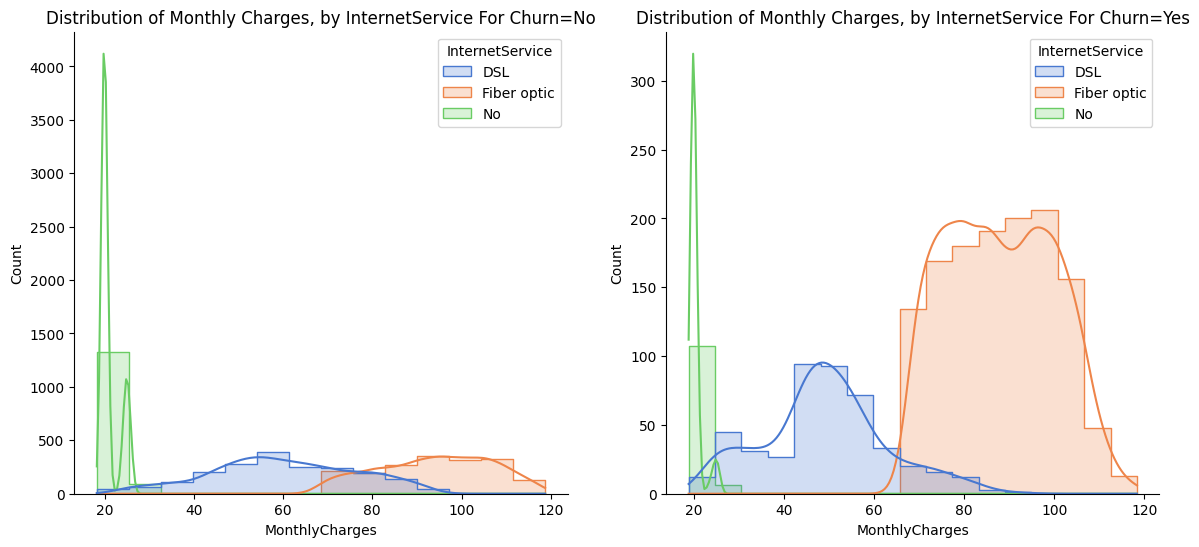

In [ ]:

# Plot histogram with KDE, using 'Churn' as hue
fig, ax = plt.subplots(1,2, figsize=(14, 6))
sns.histplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges',  ax=ax[0], kde=True, hue='InternetService', element='step', common_norm=False, palette='muted', legend=True)
sns.histplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges',  ax=ax[1], kde=True, hue='InternetService', element='step', common_norm=False, palette='muted', legend=True)

# Set plot labels and title
# plt.xlabel('Monthly Charges')
# plt.ylabel('Density')
ax[0].set_title('Distribution of Monthly Charges, by InternetService For Churn=No')
ax[1].set_title('Distribution of Monthly Charges, by InternetService For Churn=Yes')
sns.despine()
# Show the plot
plt.show()

Observation:

We can see that as monthly charges increase the churn rate increases also we can notice that the monthly charge is more for customers with internet_service=fibre optic and churn rate is also more in this scenario.

# QQPLOT

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



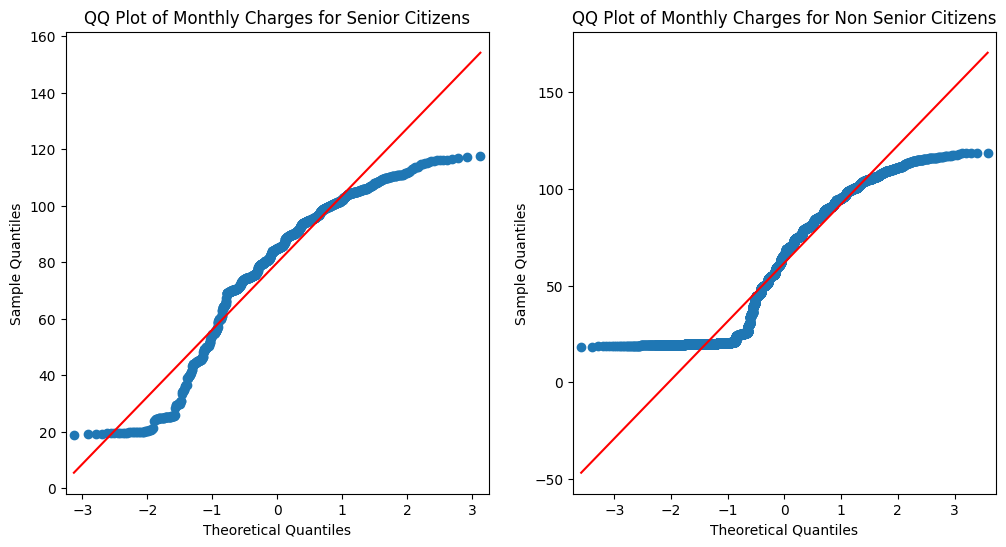

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming df is your DataFrame

# Filter data for senior and non-senior citizens
senior_citizens = df[df['SeniorCitizen'] == 1]
non_senior_citizens = df[df['SeniorCitizen'] == 0]

# Plot QQ plot for monthly charges of senior citizens
fig, ax = plt.subplots(1,2, figsize=(12, 6))

qq_senior = sm.qqplot(senior_citizens['MonthlyCharges'], line='s',  ax=ax[0], label='Senior Citizens', color='yellow')
qq_non_senior = sm.qqplot(non_senior_citizens['MonthlyCharges'], line='s', ax=ax[1], label='Non-Senior Citizens', color='orange')



ax[0].set_title('QQ Plot of Monthly Charges for Senior Citizens')
ax[1].set_title('QQ Plot of Monthly Charges for Non Senior Citizens')
# ax.legend()
plt.show()


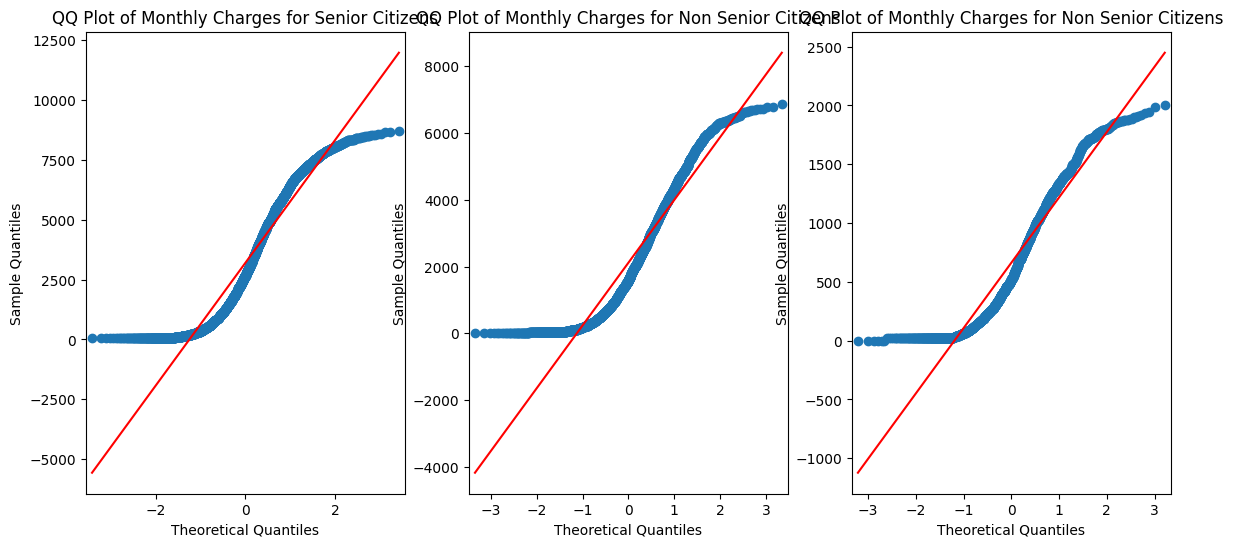

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming df is your DataFrame

# Filter data for senior and non-senior citizens
senior_citizens = df[df['InternetService'] == 'Fiber optic']
non_senior_citizens = df[df['InternetService'] == 'DSL']
non_senior_citizens1 = df[df['InternetService'] == 'No']

# Plot QQ plot for monthly charges of senior citizens
fig, ax = plt.subplots(1,3, figsize=(14, 6))

qq_senior = sm.qqplot(senior_citizens['TotalCharges'], line='s',  ax=ax[0], label='Senior Citizens', color='yellow')
qq_non_senior = sm.qqplot(non_senior_citizens['TotalCharges'], line='s', ax=ax[1], label='Non-Senior Citizens', color='orange')
qq_non_senior1 = sm.qqplot(non_senior_citizens1['TotalCharges'], line='s', ax=ax[2], label='Non-Senior Citizens', color='orange')



ax[0].set_title('QQ Plot of Monthly Charges for Senior Citizens')
ax[1].set_title('QQ Plot of Monthly Charges for Non Senior Citizens')
ax[2].set_title('QQ Plot of Monthly Charges for Non Senior Citizens')
# ax.legend()
plt.show()


## BarPlot

*Analyse the count of churners and non-churners for each column except the numerical columns*

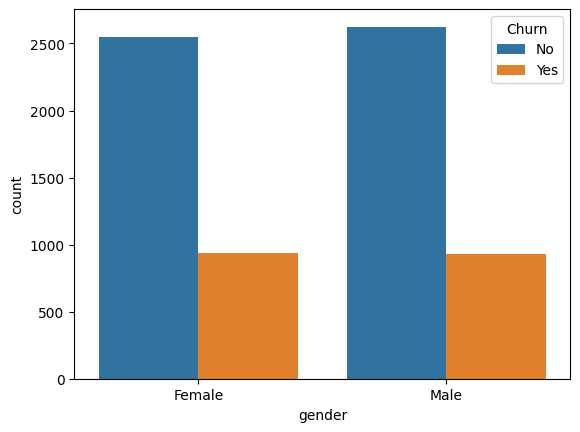

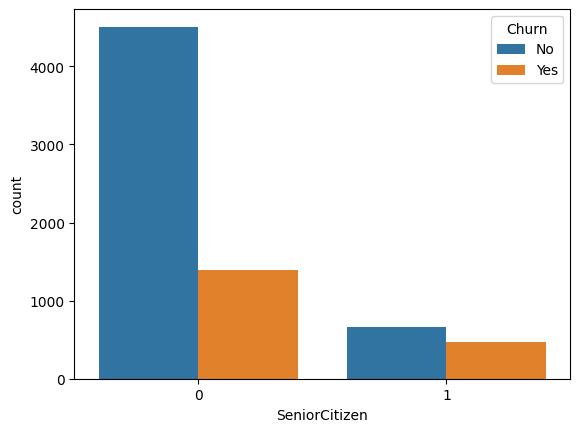

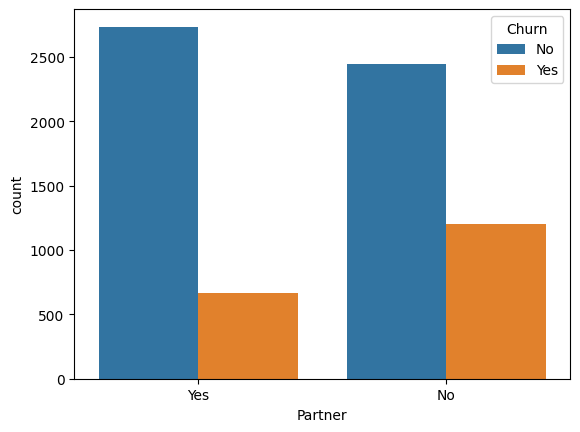

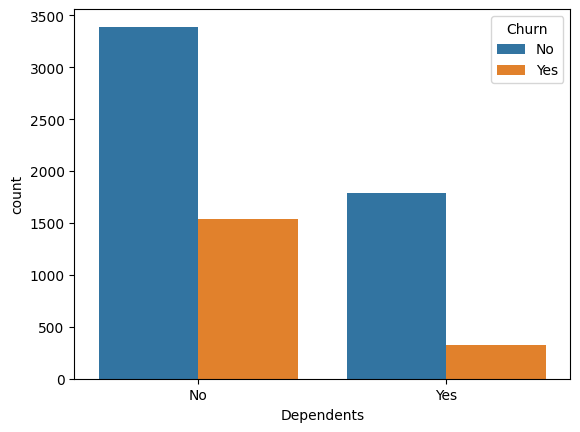

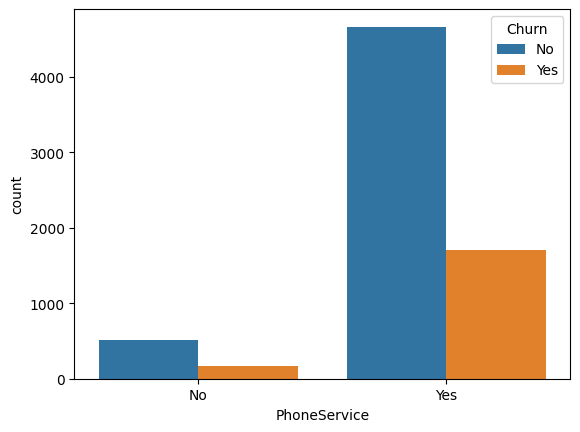

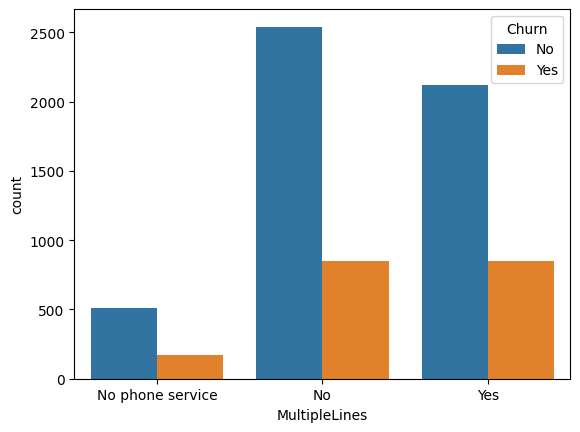

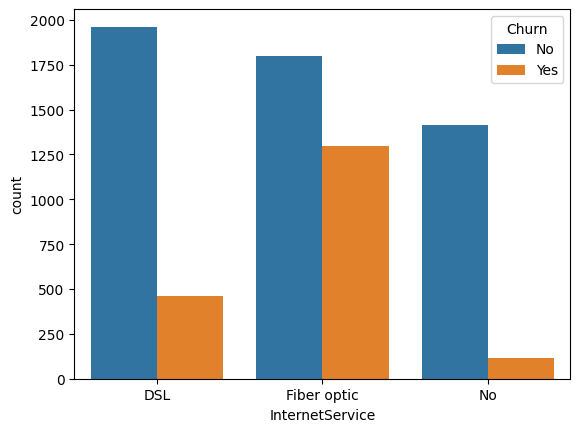

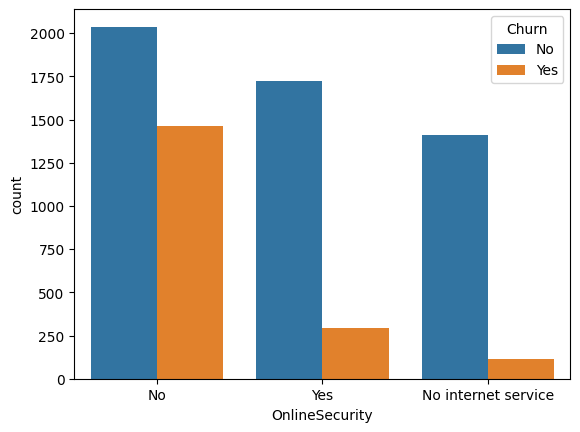

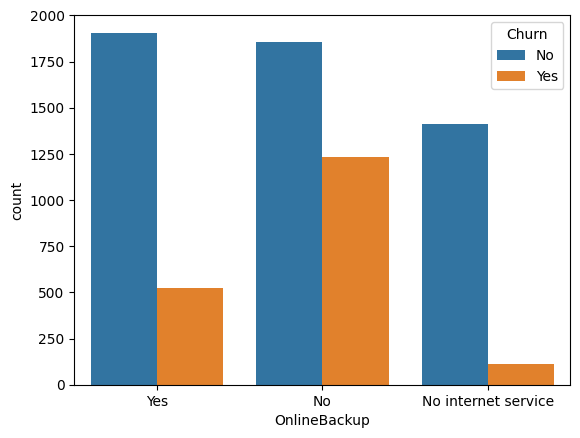

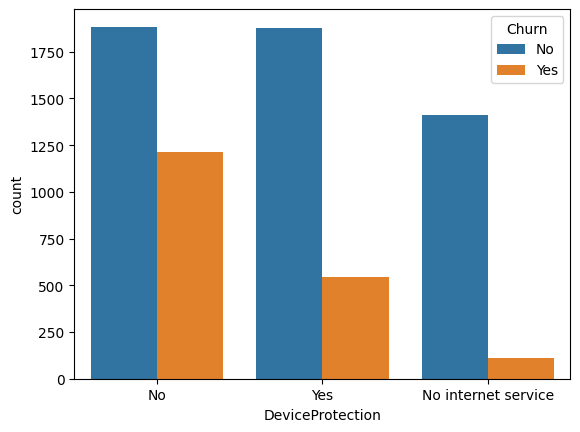

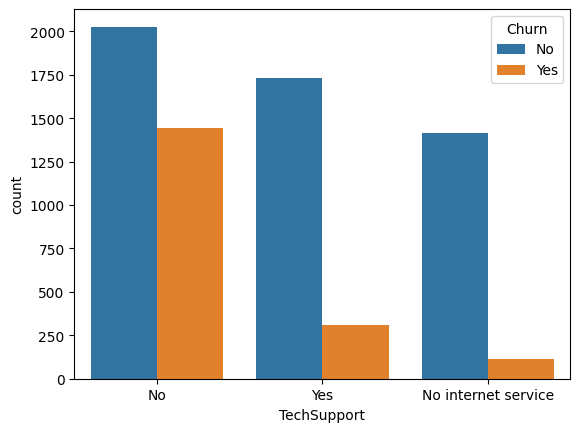

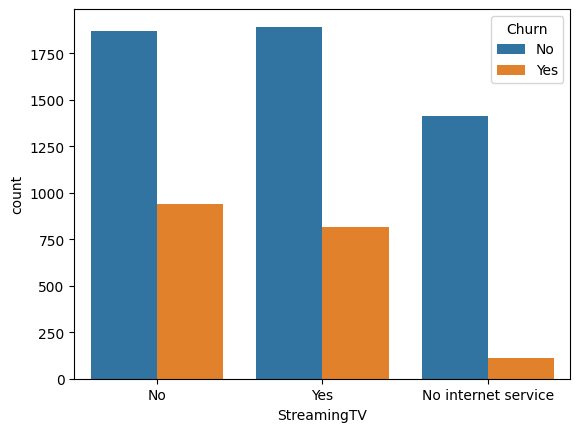

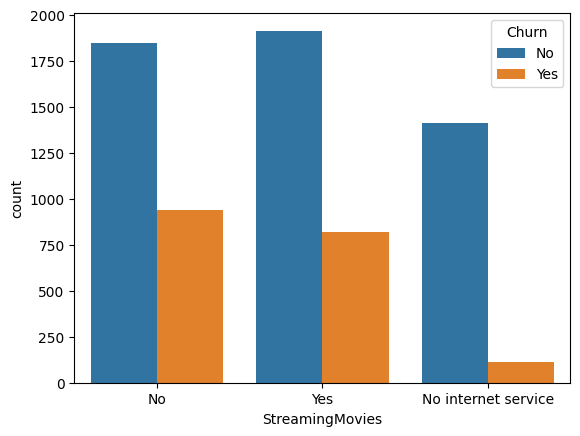

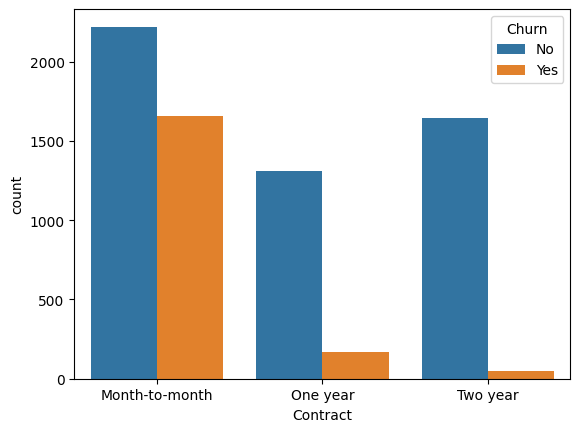

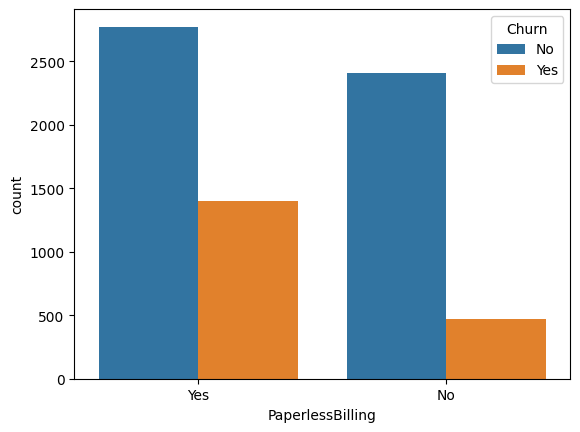

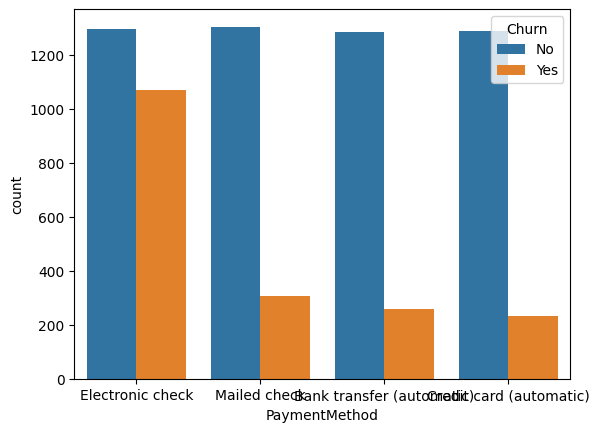

In [ ]:
# #plot bar plots
# for col in('gender', 'SeniorCitizen', 'Partner', 'Dependents',
#        'PhoneService', 'MultipleLines', 'InternetService',
#        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'):
#   sns.countplot(y = 'Churn', hue='Churn', data = df)
#   plt.show()

# plot bar plots
for i, col in enumerate(df.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
  sns.countplot(x=col, hue='Churn', data = df)
  plt.show()

Observation:

1. Gender is not an important independed attribute because the ratio of churners and non churners for male and female are almost same.
2. For SeniorCitizen the ratio of churners in senior citizen is high. i.e we can see that if a customer is senior is citizen then almost equal number of senior citizens are churners and non-churners.
3. From Partners attribute we can notice that almost 50% of customers who are single (i.e =No) are more likely to churn.
4. From Dependents attribute we can notice that almost 50% of customers who do not have dependents (i.e =No) are more likely to churn.
5. MultipleLines & StreamingTV, StreamingMovies for all categories almost 30% ratio are likely to churn.
6. Similarly we can see that customers with OnlineSecurity=no, InternetService='Fibre Optics', PhoneService='Yes', OnlineBackup='no', DeviceProtection='no', TechSupport='no', PaperlessBilling='yes', PaymentMethod='ElectronicCheck' are more likely to churn.
7. Contract='Month-to-Month' have more churners

# HeatMap

***Convert all categorical and binary columns to contain numeric values. This will help us to display heatmap and find the correlation between the attributes.***

In [ ]:
for col in ['Churn']:
  df1[col] = [1 if x == "Yes" else 0 for x in df1[col]]
df1['Churn'].unique()


array([0, 1])

In [ ]:
cols_except_target = df.iloc[:, :-1]
# Display the resulting DataFrame
cols_except_target.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
# encode all categorical columns
df2 = pd.get_dummies(cols_except_target)
# Merge 'Churn' column into df2
df2['Churn'] = df1['Churn']

In [ ]:
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


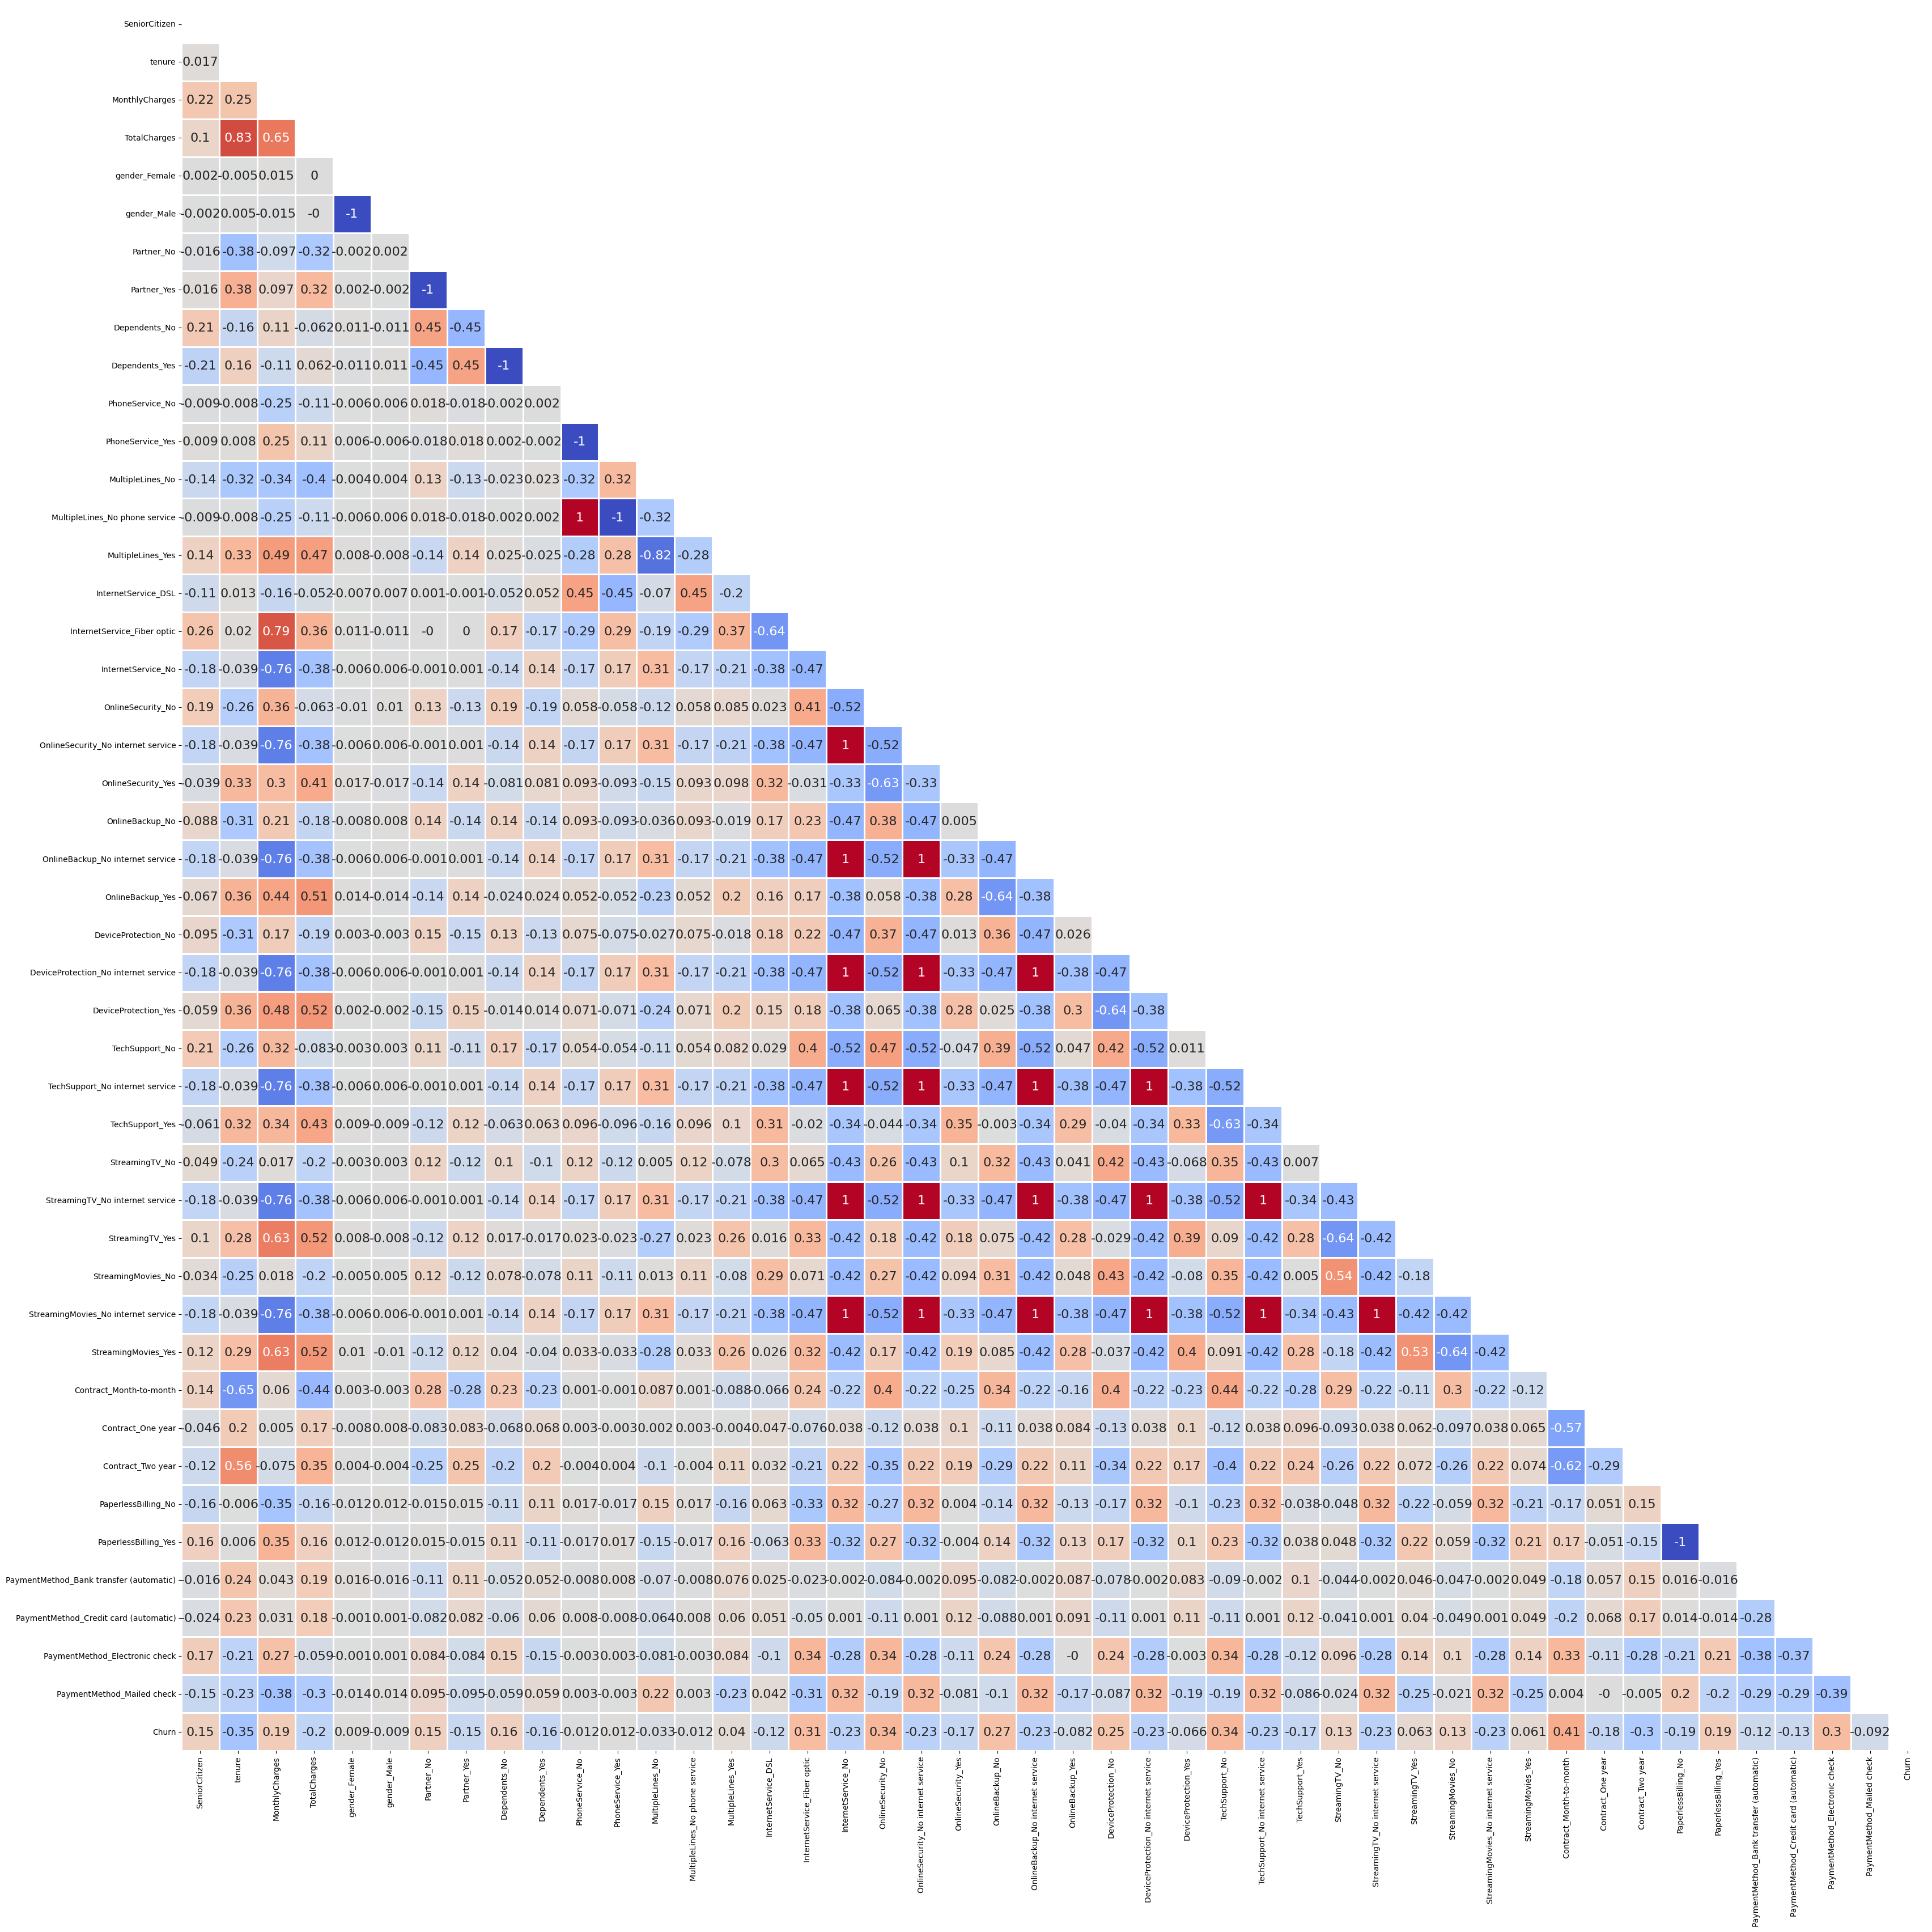

In [ ]:
corr_matrix = df2.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

Observation:

1. From Correlation of attributes with 'Churn' we can almost see a similar pattern as inferrered from the previous plots. i.e attributes Senior Citizen, MonthlyCharges, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaymentMethod, tenure, Dependents, StreamingTV are attributes that seem to most inpact the Churn rate.

2. Another benefit we can get from the heatmap is that we can find relations between attributes too.

3. Tenure and Contract_Two_Year correlation is an obvious relation indicating that as as contract term increases the tenure increases.

4. InternetService_No correlation with TechSupooprt_No_InternetService, StreamingTV_No_InternetService, StreamingMovies_No_InternetService

5. Similarly MonthCharges has a negative correlation with service such as OnlineService_No,  TechSupooprt_No_InternetService etc. Indicating that when customer is not taken additional services the monthly charge is low.

6. Also, if we notice the Churn for a combination of 'MonthlyCharges' and services with which 'MonthlyCharges' is possitively correlated we notice that the heatmap indicates that the churn rate is higher in such scenarios. From this we can infer that as customers accept more services their charges are higher and they churn sooner.

7. Low churn is observed for Long term contracts, InternetService_No, higher tenure.

8. We can also notice that attributes like gender, multipleLines, PhonesService have No impact.



# ScatterPlot

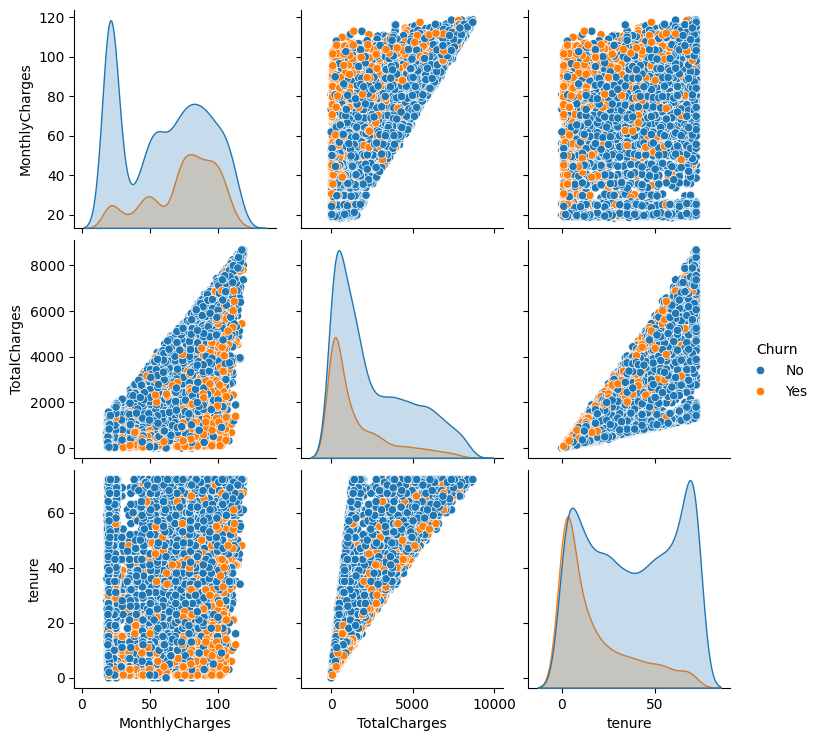

In [ ]:
# pairplots
pairplotCols = ['MonthlyCharges','TotalCharges','tenure', 'Churn']
sns.pairplot(df[pairplotCols], hue = 'Churn')

# CONCLUSION

The data set contains 7043 records in total with 21 columns.

Churn is the target variable.

Following are the attributes of the dataset
'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'

# Question 3: WHO ARE MORE LIKELY TO CHURN

***From the visual analysis we can make the following conclusions:***

For SeniorCitizen the ratio of churners in senior citizen is high. i.e we can see that if a customer is senior is citizen then almost equal number of senior citizens are churners and non-churners.

From Partners attribute we can notice that almost 50% of customers who are single (i.e =No) are more likely to churn.

From Dependents attribute we can notice that almost 50% of customers who do not have dependents (i.e =No) are more likely to churn.

MultipleLines & StreamingTV, StreamingMovies for all categories almost 30% ratio are likely to churn.

Similarly we can see that customers with OnlineSecurity=no, InternetService='Fibre Optics', PhoneService='Yes', OnlineBackup='no', DeviceProtection='no', TechSupport='no', PaperlessBilling='yes', PaymentMethod='ElectronicCheck' are more likely to churn.
Contract='Month-to-Month' have more churners


By Comparing the histrograms for MultipleLines, InternetServices and OnlineSecurity we can see that around 20% of customers who were offered FibreOpticInterServices have churned the most.

Also 20% of customers who were not offered OnlineSecurity have also churned.

By comparing the histograms we can see that constract of type month-to-month is more volatile with more than 25% customers churning. Two year contract seem to be more reliable.

Most of the customers churn before completing a tenure of 5 months. As time increasing the churn rate seems to reduce.
